In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

In [19]:
file_path = input("Enter file path:")
print("Chosen file:", file_path,"\n")

Chosen file: /home/felipe/classes2021_2/PDI_2021_2/02_Trabalhos_Individuais/Recursos/paolina.tiff 



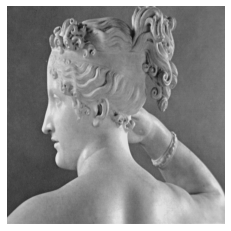

(512, 512)

In [20]:
img = cv.imread(file_path,0)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.show()
img.shape

In [21]:
def downsampling(img, downfactor):
    """This function does the downsampling of a square input Image"""
    if not(math.log2(downfactor).is_integer() and img.shape[0] == img.shape[1]):
        print("ERRO: This resize just made power of 2 recizing.")
        h = img.shape[0]
        w = img.shape[1]
        print("Figure size: "+str(h)+","+str(w))
        print("Down Factor: "+str(downfactor))
        sys.exit()
    else:
        n_dimension = int(img.shape[0]/downfactor)
        new_image = np.zeros((n_dimension,n_dimension), dtype= np.uint8)
        auxj = 0
        auxi = 0
        j_count = -1
        i_count = -1
        for i in range(img.shape[0]-1):
            i_count = i_count +1
            if i_count == downfactor:
                i_count = 0
            if i_count == 0:
                for j in range(img.shape[1]-1):
                    j_count = j_count +1
                    if j_count == downfactor:
                        j_count = 0 
                    if j_count == 0:
                        new_image[auxi,auxj] = img[i,j]
                        auxj = auxj + 1
                auxj = 0
                j_count = -1
                auxi = auxi +1
        new_image = np.uint8(new_image)
    return new_image    


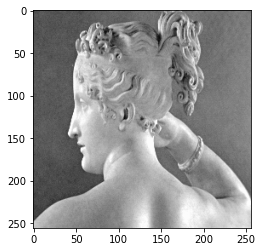

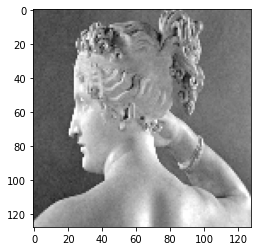

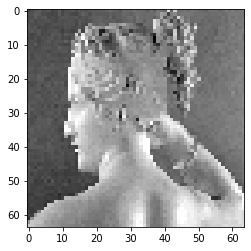

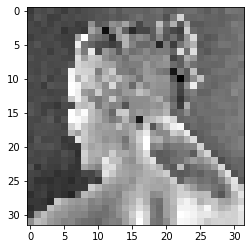

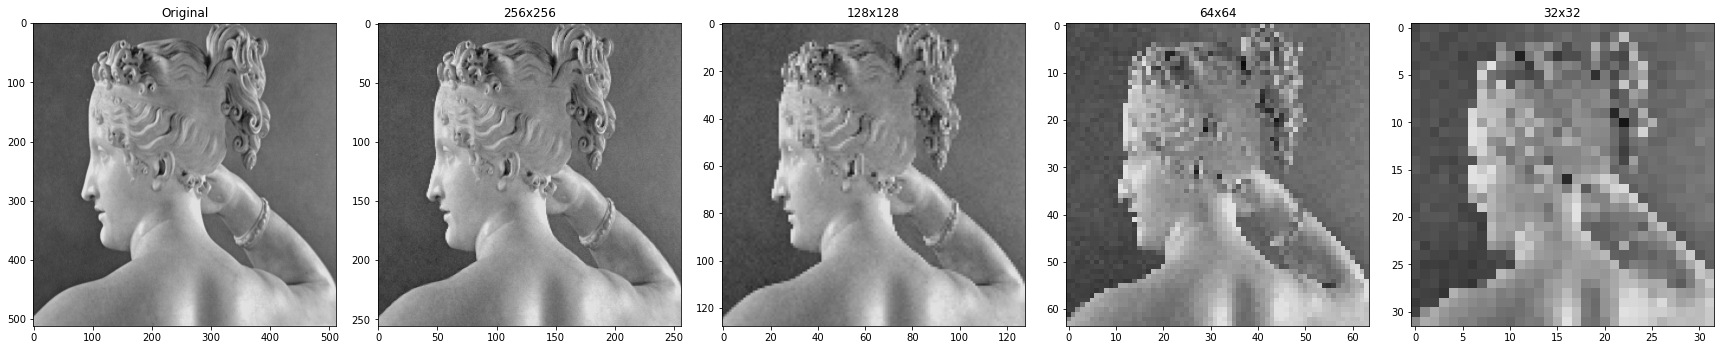

In [22]:
image1_256 = downsampling(img, 2)
fig = plt.figure()
plt.imshow(image1_256, cmap='gray')
image1_128 = downsampling(img, 4)
fig = plt.figure()
plt.imshow(image1_128, cmap='gray')

image1_64  = downsampling(img, 8)
fig = plt.figure()
plt.imshow(image1_64, cmap='gray')

image1_32  = downsampling(img, 16)
fig = plt.figure()
plt.imshow(image1_32, cmap='gray')


fig1 = plt.figure(figsize=(24,5))
ax1_1 = plt.subplot(1,5,1)
ax1_2 = plt.subplot(1,5,2)
ax1_3 = plt.subplot(1,5,3)
ax1_4 = plt.subplot(1,5,4)
ax1_5 = plt.subplot(1,5,5)
ax1_1.imshow(img,cmap='gray', vmin = 0, vmax = 255)
ax1_1.set_title('Original')
ax1_2.imshow(image1_256,cmap='gray', vmin = 0, vmax = 255)
ax1_2.set_title('256x256')
ax1_3.imshow(image1_128,cmap='gray', vmin = 0, vmax = 255)
ax1_3.set_title('128x128')
ax1_4.imshow(image1_64,cmap='gray', vmin = 0, vmax = 255)
ax1_4.set_title('64x64')
ax1_5.imshow(image1_32,cmap='gray', vmin = 0, vmax = 255)
ax1_5.set_title('32x32')
plt.tight_layout()

plt.show()


In [23]:
def upsampleNNI(img, upfactor):
    """This function does the upsample with NNI method for a square input Image"""
    h = img.shape[0]
    w = img.shape[1]
    if not(math.log2(upfactor).is_integer() and h == w):
        print("ERRO: This resize just made power of 2 recizing.")
        
        print("Figure size: "+str(h)+","+str(w))
        print("Reduction: "+str(upfactor))
        sys.exit()
    else:
        b = np.ones((upfactor,upfactor),dtype= np.uint8)
        upsampled_img = np.kron(img, b)
        upsampled_img = np.uint8(upsampled_img)
    return upsampled_img

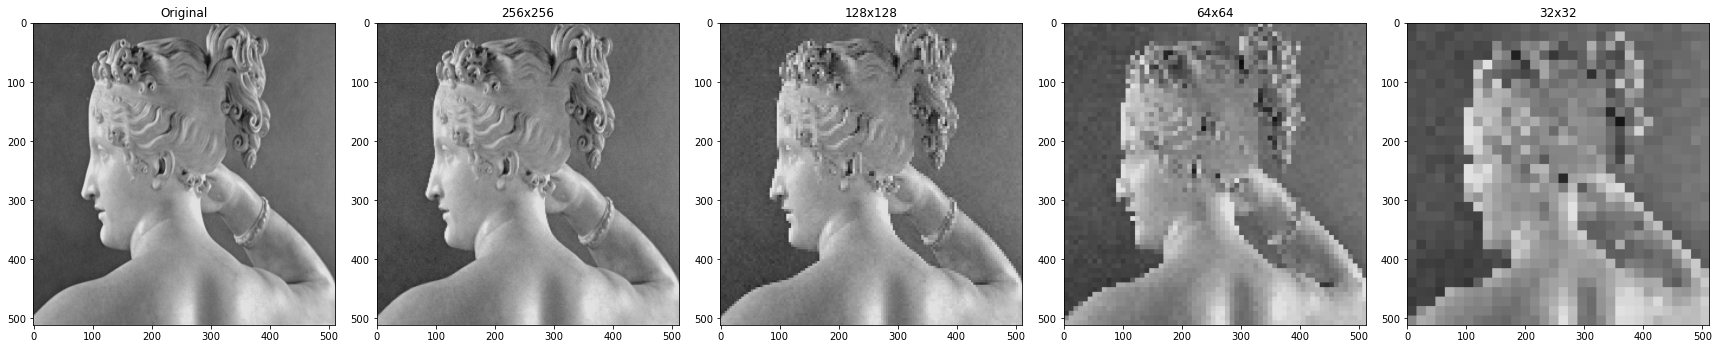

In [24]:
image1_d256 = downsampling(img, 2)
image1_u256 = upsampleNNI(image1_d256,2)
image1_d128 = downsampling(img, 4)
image1_u128 = upsampleNNI(image1_d128,4)
image1_d64  = downsampling(img, 8)
image1_u64 = upsampleNNI(image1_d64,8)
image1_d32  = downsampling(img, 16)
image1_u32 = upsampleNNI(image1_d32,16)


fig1 = plt.figure(figsize=(24,5))
ax1_1 = plt.subplot(1,5,1)
ax1_2 = plt.subplot(1,5,2)
ax1_3 = plt.subplot(1,5,3)
ax1_4 = plt.subplot(1,5,4)
ax1_5 = plt.subplot(1,5,5)
ax1_1.imshow(img,cmap='gray', vmin = 0, vmax = 255)
ax1_1.set_title('Original')
ax1_2.imshow(image1_u256,cmap='gray', vmin = 0, vmax = 255)
ax1_2.set_title('256x256')
ax1_3.imshow(image1_u128,cmap='gray', vmin = 0, vmax = 255)
ax1_3.set_title('128x128')
ax1_4.imshow(image1_u64,cmap='gray', vmin = 0, vmax = 255)
ax1_4.set_title('64x64')
ax1_5.imshow(image1_u32,cmap='gray', vmin = 0, vmax = 255)
ax1_5.set_title('32x32')
plt.tight_layout()

In [25]:
def quantizacao(img, nbytes):
    info = np.iinfo(img.dtype) # Get the information of the incoming image type
    img = img.astype(np.float64) / info.max # normalize the data to 0 - 1
    img = (2**nbytes)*img
    return img

0
0
0
1
0
3
0
7
0
14
0
28
0
57
1
114
2
228


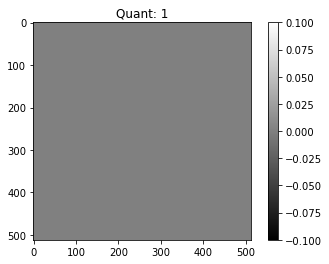

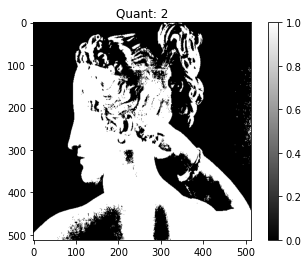

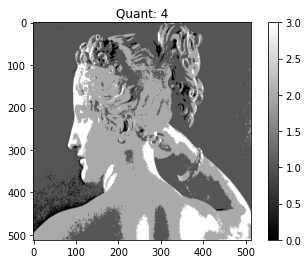

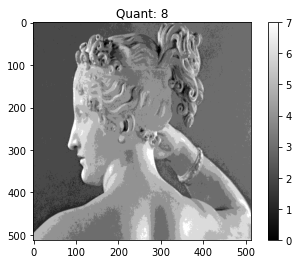

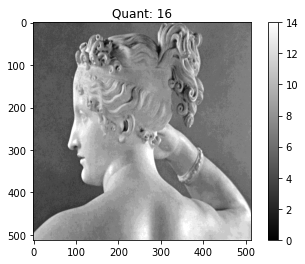

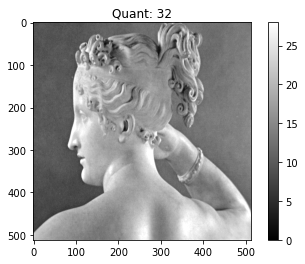

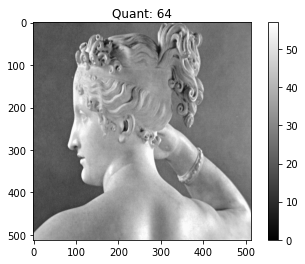

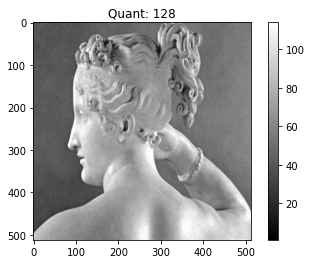

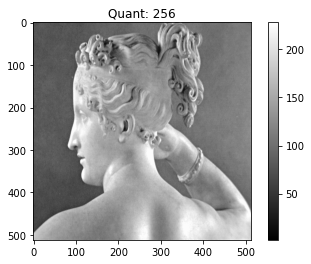

In [26]:
for i in range(9):
    info = np.iinfo(img.dtype) # Get the information of the incoming image type
    img_quant = img.astype(np.float64) / info.max # normalize the data to 0 - 1
    img_quant = (2**i)*img_quant
    img_quant = img_quant.astype(np.uint8)
    print(np.amin(img_quant))
    print(np.amax(img_quant))
    fig = plt.figure()
    plt.imshow(img_quant, cmap='gray', vmin = np.amin(img_quant), vmax = np.amax(img_quant))
    plt.title("Quant: "+str(2**i))
    plt.colorbar()

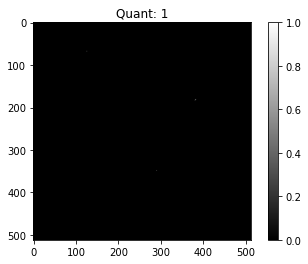

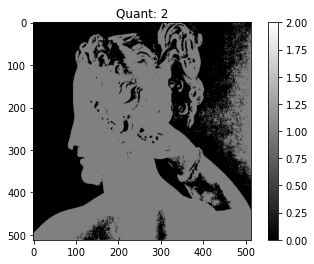

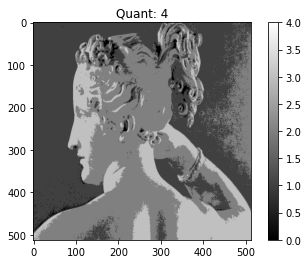

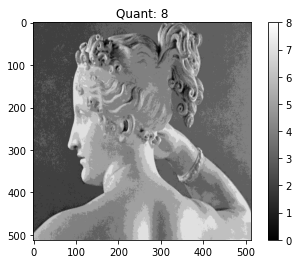

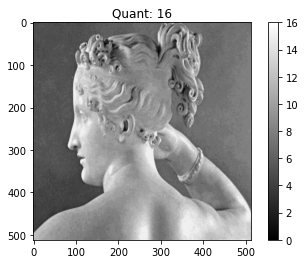

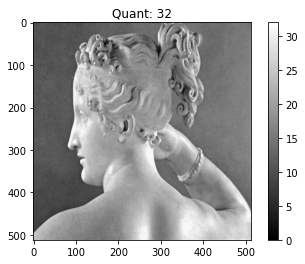

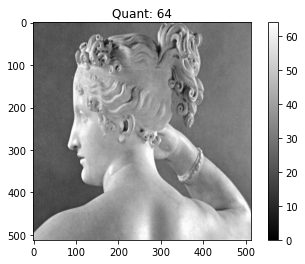

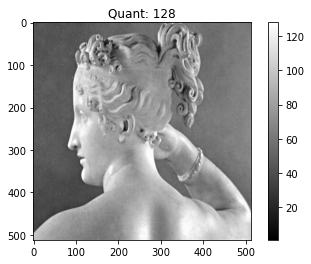

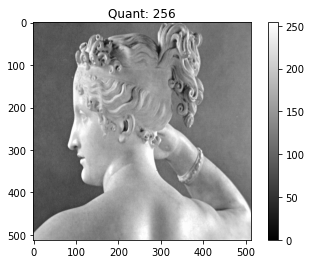

In [27]:
img_test = {}
img_test[0] = img
aux = 1
for i in range(9):
    img_quant = np.float64(img)
    img_quant = img_quant/np.amax(img_quant)
    img_quant = np.uint8(img_quant * (2**i))
    fig = plt.figure()
    plt.imshow(img_quant, cmap='gray')
    plt.title("Quant: "+str(2**i))
    plt.colorbar()
    img_test[aux] = img_quant
    aux += 1

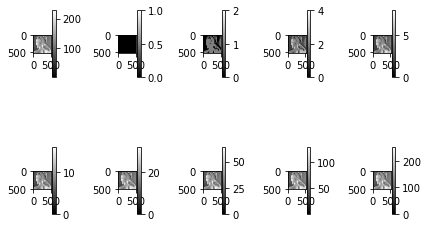

In [28]:
fig, axs = plt.subplots(2,5)
aux = 0
for row in range(2):
    for col in range(5):
        testdotest = axs[row,col].imshow(img_test[aux],cmap='gray')
        fig.colorbar(testdotest, ax=axs[row,col])
        aux +=1
plt.tight_layout()
plt.show()

In [29]:

img_quant = img.astype(np.uint64) / info.max # normalize the data to 0 - 1
img_quant

array([[0.26666667, 0.3372549 , 0.26666667, ..., 0.43529412, 0.41568627,
        0.41176471],
       [0.2745098 , 0.2627451 , 0.30588235, ..., 0.39607843, 0.43137255,
        0.40784314],
       [0.26666667, 0.28235294, 0.26666667, ..., 0.42352941, 0.4       ,
        0.41960784],
       ...,
       [0.68235294, 0.69803922, 0.69019608, ..., 0.74509804, 0.76470588,
        0.73333333],
       [0.6745098 , 0.68235294, 0.69803922, ..., 0.76470588, 0.76078431,
        0.74901961],
       [0.70980392, 0.70196078, 0.67058824, ..., 0.79215686, 0.79607843,
        0.77647059]])

In [30]:
img_quant = (2**0)*img_quant
img_quant.astype(np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

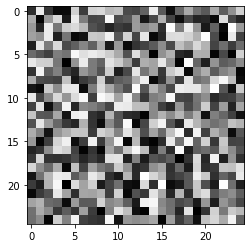

In [31]:
img_exemplo = np.random.rand(25,25)*255
plt.imshow(img_exemplo,cmap='gray')
plt.show()

In [32]:
img_exemplo[0,:]


array([ 46.21094887, 234.70438035,  53.61269145,  10.18252382,
        10.99194972, 209.06907488,  61.77281784, 210.26592164,
       216.17179935, 184.44132361, 192.65767798,  75.54753417,
        69.78194128,  98.9238147 , 236.54574046,  88.96671944,
        17.12330199, 102.90754154, 170.14596889, 112.70759227,
        89.78240765, 169.52649735,  93.07550543, 145.54443255,
       207.98829679])

In [33]:
pos_vec = np.array(range(26))
pos_vec =

SyntaxError: invalid syntax (3170325260.py, line 2)

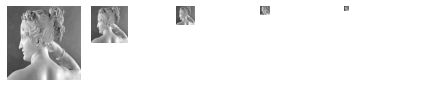

In [39]:
fig = plt.figure()
ax1 = plt.subplot(151, xlim= (0,512), ylim= (512,0) )
ax2 = plt.subplot(152, xlim=(0,512), ylim=(512,0))
ax3 = plt.subplot(153, xlim=(0,512), ylim=(512,0))
ax4 = plt.subplot(154, xlim=(0,512), ylim=(512,0))
ax5 = plt.subplot(155, xlim=(0,512), ylim=(512,0))

ax1.imshow(img, cmap ='gray')
ax1.set_axis_off()
ax2.imshow(image1_256, cmap='gray')
ax2.set_axis_off()
ax3.imshow(image1_128, cmap='gray')
ax3.set_axis_off()
ax4.imshow(image1_64, cmap='gray')
ax4.set_axis_off()
ax5.imshow(image1_32, cmap='gray')
ax5.set_axis_off()
plt.tight_layout()
plt.show()

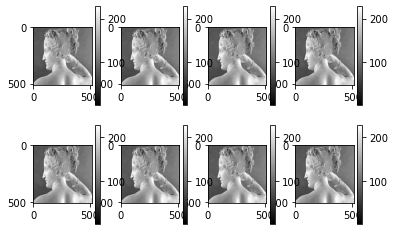

In [42]:
fig1, axes = plt.subplots(2,4)
aux = 0
for ax in axes.flat:
    im = ax.imshow(img, cmap = 'gray')
    fig1.colorbar(im, ax=ax)

In [43]:
n = [7,6,5,4,3,2,1]
n[1]

6